# Ejemplo de clasificación binaria

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Octubre de 2024  
**Versión:** 1.0  

---

## Descripción

Este notebook muestra la creación de modelos predictivos para variable discreta usando algoritmos de clasificación.

Las métricas usadas en este modelo de clasificación son:

+ accuracy
+ precision_score
+ recall
+ F1 score
+ matriz de confusión
+ roc_auc
---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn (1.3.2)

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import sklearn
print(sklearn.__version__)
````

# Métricas

## ***1. F1-score***
Es una métrica que se utiliza para evaluar el rendimiento de un modelo de clasificación, especialmente en problemas con clases desbalanceadas. Es la media armónica entre la **precisión** (precision) y la **sensibilidad** (recall), y se interpreta de la siguiente manera:

1. **Componentes principales**:
   - **Precisión (Precision)**: Es la proporción de verdaderos positivos (predicciones correctas de la clase positiva) sobre el total de predicciones positivas (verdaderos positivos + falsos positivos). Mide la exactitud de las predicciones positivas del modelo.
   - **Sensibilidad (Recall)** o **Tasa de verdaderos positivos**: Es la proporción de verdaderos positivos sobre el total de casos positivos reales (verdaderos positivos + falsos negativos). Indica qué tan bien el modelo captura todas las instancias positivas.

2. **Cálculo del F1-score**:
   
   $F1score = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

   La fórmula es una media armónica que da igual importancia tanto a la precisión como a la sensibilidad. El resultado estará en el rango de 0 a 1, donde un valor más alto indica un mejor rendimiento.

3. **Interpretación**:
   - **F1-score cercano a 1**: Indica un buen equilibrio entre precisión y sensibilidad, es decir, el modelo tiene tanto una alta precisión como un buen recall.
   - **F1-score bajo**: Indica un mal equilibrio, sugiriendo que el modelo tiene problemas con la precisión o la sensibilidad, o ambos.
   - **Adecuado para datos desbalanceados**: El F1-score es especialmente útil cuando las clases están desbalanceadas, ya que considera tanto los falsos positivos como los falsos negativos.

4. **Usos comunes**:
   - Es una métrica recomendada cuando se busca un equilibrio entre precisión y sensibilidad, y especialmente cuando es importante evitar tanto falsos positivos como falsos negativos.
   - Puede ser utilizado para comparar modelos de clasificación y seleccionar el que ofrezca el mejor equilibrio entre estas dos métricas.

En resumen, el **F1-score** ayuda a entender cómo se desempeña un modelo de clasificación en términos de precisión y sensibilidad combinadas, y es especialmente valioso en problemas donde los errores tienen diferentes costos o hay un desbalance en las clases.

## ***2. ROC AUC***
El valor de **ROC AUC** (Receiver Operating Characteristic - Area Under the Curve) en clasificación mide la capacidad de un modelo para distinguir entre clases positivas y negativas. La interpretación es la siguiente:

1. **Definición básica**:
   - El **ROC** es una curva que muestra la relación entre la **tasa de verdaderos positivos** (TPR, o sensibilidad) y la **tasa de falsos positivos** (FPR) a medida que varía el umbral de decisión del modelo.
   - El **AUC (Area Under the Curve)** mide el área bajo esta curva. Es un valor que va de 0 a 1 y resume el rendimiento del modelo en un solo número.

2. **Interpretación del valor de AUC**:
   - **AUC = 1.0**: indica un modelo perfecto. El modelo es capaz de distinguir correctamente todas las instancias positivas de las negativas sin errores.
   - **AUC = 0.5**: indica un modelo que no tiene capacidad para clasificar mejor que el azar. La curva ROC sería una línea diagonal, lo que sugiere que el modelo no tiene poder discriminante.
   - **0.5 < AUC < 1.0**: cuanto más cerca esté de 1, mejor es el modelo para discriminar entre las clases. Un AUC más alto indica un mejor rendimiento del modelo en la clasificación de casos positivos frente a negativos.
   - **AUC < 0.5**: sugiere que el modelo tiene un desempeño peor que el azar y podría estar etiquetando incorrectamente las clases.

3. **Uso en la práctica**:
   - Un AUC más alto significa que, en promedio, el modelo asigna una probabilidad mayor a las instancias positivas que a las negativas.
   - Se utiliza para comparar diferentes modelos de clasificación; un modelo con un AUC más alto se considera mejor.

En resumen, el **ROC AUC** evalúa qué tan bien el modelo clasifica los casos positivos frente a los negativos, y un valor más alto indica un mejor desempeño.


# Actividades iniciales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.tree import plot_tree


import warnings
warnings.filterwarnings('ignore')

## Carga de la data

In [2]:
!wget https://www.dropbox.com/s/gvxf9ztdy59n1gp/heart.csv

--2024-10-19 12:25:52--  https://www.dropbox.com/s/gvxf9ztdy59n1gp/heart.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/2t4hm96h5yqtoe3zu0mlz/heart.csv?rlkey=rtrmj1ym0ltm76z165e0c3uel [following]
--2024-10-19 12:25:52--  https://www.dropbox.com/scl/fi/2t4hm96h5yqtoe3zu0mlz/heart.csv?rlkey=rtrmj1ym0ltm76z165e0c3uel
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc00ef891a6d388daa45ca44e308.dl.dropboxusercontent.com/cd/0/inline/CcvGSWrBUY7WA9ZWdjlxqpBiW4rczN-0Z-ooWQUr8vqDpmx52fMVep5SyhpatLKuZCiJ8KfrS9gaXCT59je_cdUGkxoLfGNBhStVyJVzwjqjuY9QLjN_w_EwJCvcDfUsvEsBtovwmOu3-T79Z_1n4eGX/file# [following]
--2024-10-19 12:25:52--  https://uc00ef891a6d388daa45ca44e308.dl.dropboxusercontent.com/cd/0/inline/CcvGSWrBUY

In [3]:
data_heart = pd.read_csv("heart.csv")
data_heart.shape

(303, 14)

$\textbf{COMENTARIO}$

Existen 303 observaciones que corresponden a 303 pacientes de los cuales se tienen 14 características o variables.

## Descripción de la data

+ Age : Age of the patient
+ Sex : Sex of the patient
+ exang: exercise induced angina (1 = yes; 0 = no)
+ caa: number of major vessels (0-3)
+ cp : Chest Pain type chest pain type
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
    + Value 4: asymptomatic
+ trtbps : resting blood pressure (in mm Hg)
+ chol : cholestoral in mg/dl fetched via BMI sensor
+ fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
+ rest_ecg : resting electrocardiographic results
    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
+ thalach : maximum heart rate achieved
+ oldpeak : ST depression induced by exercise relative to rest
+ thall : thalassemia (Enfermedad sanguínea caracterizada por cantidades inferiores a las normales de una proteína transportadora de oxígeno)
    + 0 : null
    + 1 : fixed defec
    + 2 : normal
    + 3 : reversable defect
+ slp : the slope of the peak exercise ST segment
    + 0 : unsloping
    + 1 : flat
    + 2 : downsloping
+ output : 0= less chance of heart attack 1= more chance of heart attack
    + 0 : 50% diameter narrowing. less chance of heart disease
    + 1 : 50% diameter narrowing. more chance of heart disease

In [ ]:
data_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Revisión de tipos de variables

In [ ]:
data_heart.dtypes

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


$\textbf{COMENTARIO}$

Se aprecia la existencia de 14 variables cuantitativas

## Revisión de valores nulos

In [ ]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


---


$\textbf{COMENTARIO}$


---
La celda anterior indica la inexistencia de valores nulos

## Revisión de la distribución de las clases

In [4]:
data_heart.groupby("output").size()

,0
output,
0,138
1,165


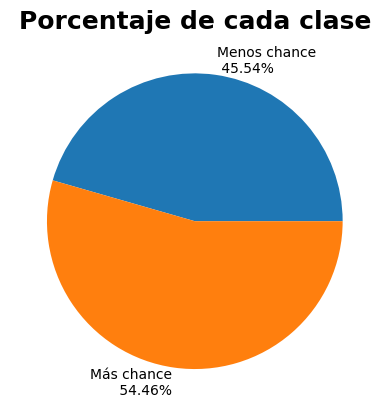

In [5]:
# Gráfico de torta del porcentaje de cada clase
clases = np.array([data_heart[data_heart.output == 0.0].shape[0],
                   data_heart[data_heart.output == 1.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Menos chance\n ' + labels[0]
labels[1] = 'Más chance\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de cada clase', fontsize=18, fontweight="bold")
plt.show()

---
$\textbf{COMENTARIO}$

----
Se presenta una distribución más o menos simétrica.

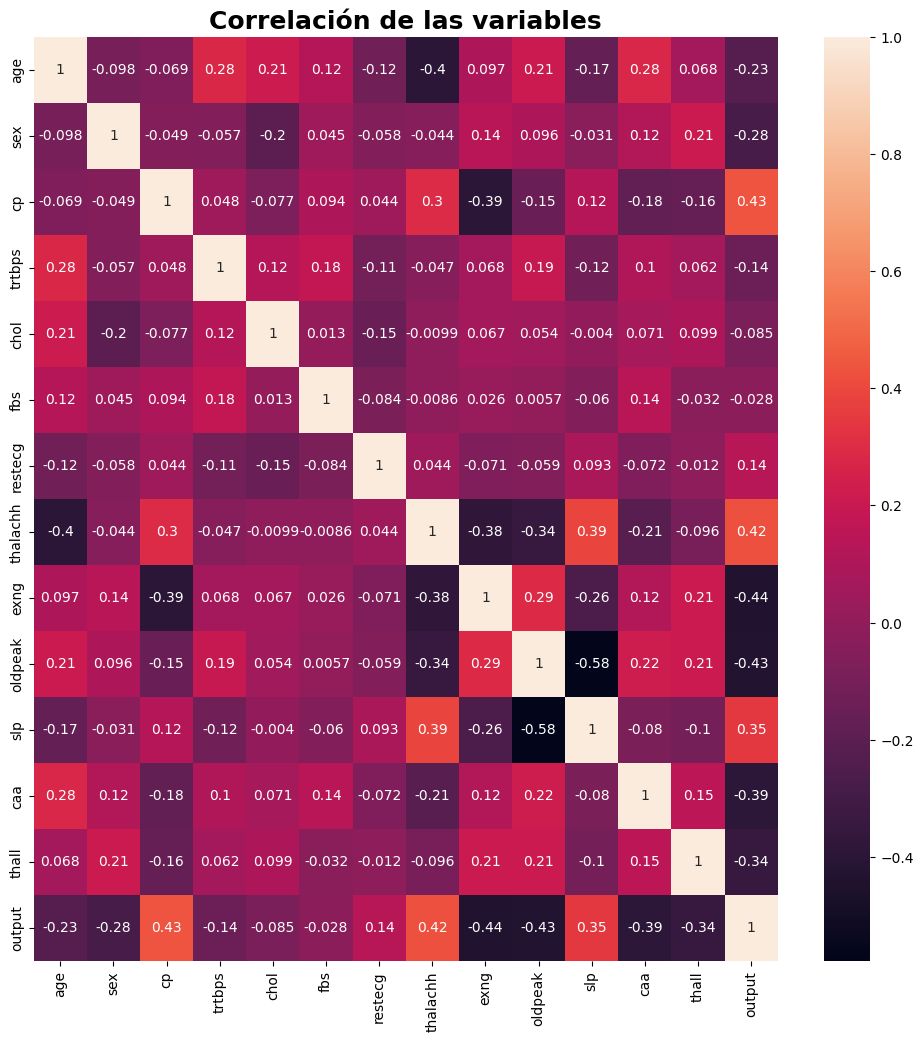

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(data_heart.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=18, fontweight="bold")
plt.show()

---
### Comentarios de la matriz de correlación
---

Considerando que la variable objetivo es la que indica si el paciente presenta un riesgo menor o mayor a sufrir un ataque cardìaco se obtienen estos comentarios acerca de la matriz:

+ 9 de las 13 variables presentan una correlación negativa con la variable objetivo.
+ 4 de las 13 variables presentan una correlación positiva con la variable objetivo.

Se revisa la correlación con la variable objetivo

In [10]:
df_correlacion = pd.DataFrame(data_heart.corr()[13:].values.reshape(-1, 1), columns = ['correlacion'])
df_correlacion.index = data_heart.columns
df_correlacion.correlacion.sort_values(ascending = False)

,correlacion
output,1.000000
cp,0.433798
thalachh,0.421741
slp,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trtbps,-0.144931
age,-0.225439
sex,-0.280937


+ Existen 2 variables que presentan una correlación positiva superior a 0.4 con la variable objetivo.
+ Existen 2 variables que presentan una correlación negativa superior a -0.4.
+ Las cuatro variables pueden ser posibles predictoras del modelo, por lo que la línea base se va a construir en función de ellas.

In [11]:
print("Mayor correlacion positiva : ",
    df_correlacion.query("correlacion < 1 and correlacion >= 0.4").index.values)

print("Mayor correlacion negativa : ",
    df_correlacion.query("correlacion <= -0.4").index.values)

# Arma la lista con los nombres de las variables
lst_features = np.append(df_correlacion.query("correlacion < 1 and correlacion >= 0.4").index.values,
    df_correlacion.query("correlacion <= -0.4").index.values)

Mayor correlacion positiva :  ['cp' 'thalachh']
Mayor correlacion negativa :  ['exng' 'oldpeak']


## Análisis de variables

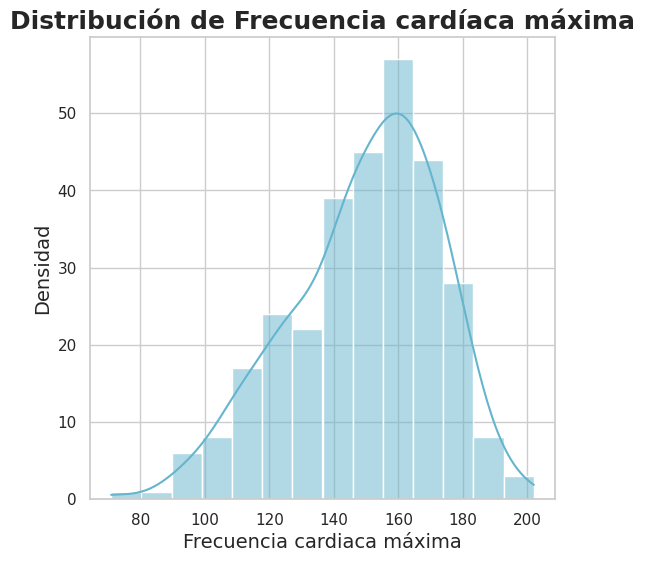

In [12]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(data_heart['thalachh'], kde = True, color = 'c')
plt.title('Distribución de Frecuencia cardíaca máxima', fontsize = 18, fontweight="bold")
plt.xlabel("Frecuencia cardiaca máxima", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [ ]:
pd.DataFrame(data_heart.thalachh.describe()).T

,count,mean,std,min,25%,50%,75%,max
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


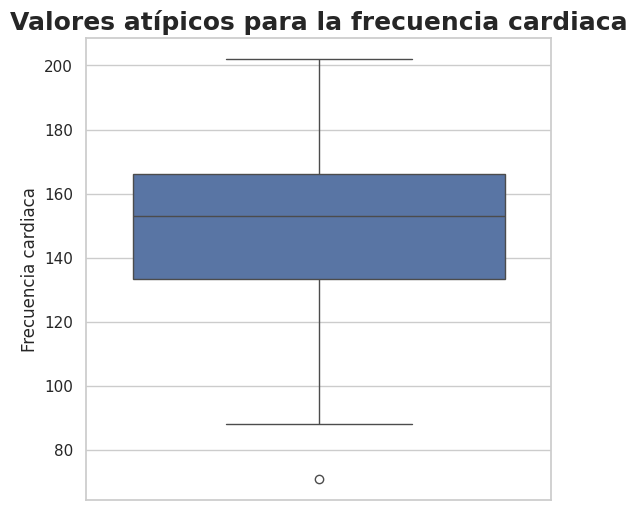

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para la frecuencia cardiaca", fontsize=18, fontweight="bold")
plt.ylabel("Frecuencia cardiaca")
sns.boxplot(y='thalachh',data=data_heart);

---
### Comentarios de la frecuencia cardiaca
----

+ En promedio los pacientes presentan una frecuencia cardíaca de 149.6 latidos por minuto (lpm)
+ La frecuencia cardiaca máxima registrada es de 202 lpm
+ Se aprecia que existe un valor atípico que corresponde a la frecuencia cardíaca mínima (71 lpm)

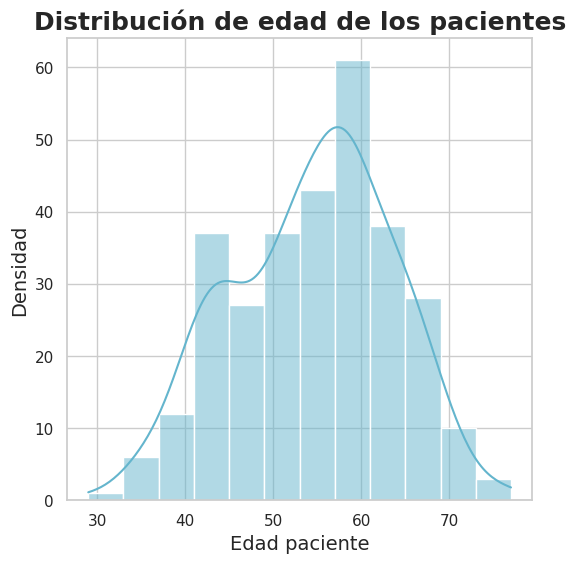

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(data_heart['age'], kde = True, color = 'c')
plt.title('Distribución de edad de los pacientes', fontsize = 18, fontweight="bold")
plt.xlabel("Edad paciente", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [ ]:
pd.DataFrame(data_heart.age.describe()).T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0


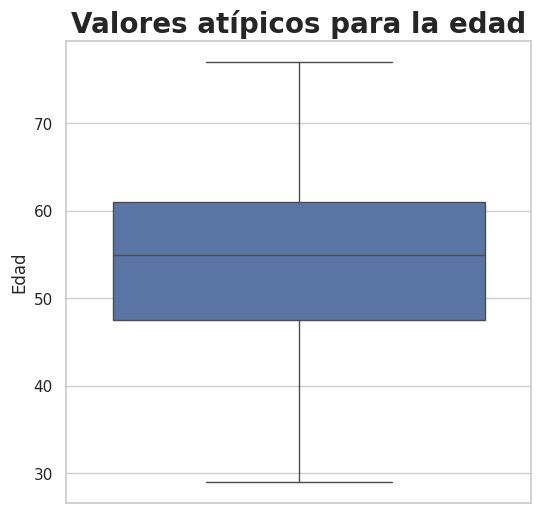

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para la edad", fontsize=20, fontweight="bold")
plt.ylabel("Edad")
sns.boxplot(y='age',data=data_heart);

---
### Comentarios acerca de la edad de los pacientes
---

+ Paciente con mayor edad tiene 77 años.
+ El 50% de los pacientes tiene 55 años o menos
+ El paciente joven tiene 29 años
+ El promedio de edad de los pacientes es de 54 años aproximadamente.
+ Inexistencia de valores atípicos (outliers)

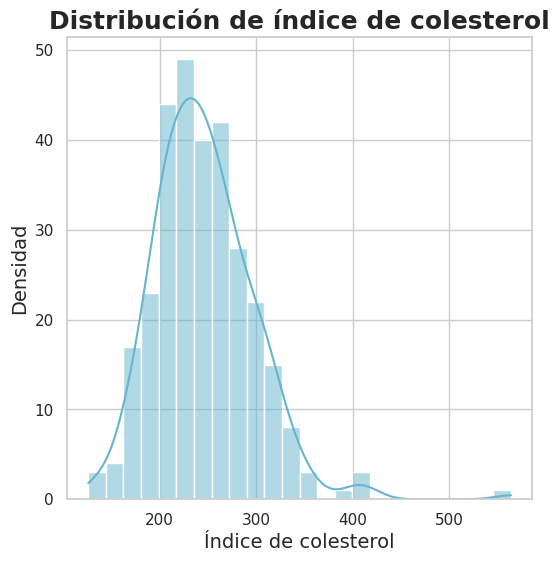

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(data_heart['chol'], kde = True, color = 'c')
plt.title('Distribución de índice de colesterol', fontsize = 18, fontweight="bold")
plt.xlabel("Índice de colesterol", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [ ]:
pd.DataFrame(data_heart.chol.describe()).T

,count,mean,std,min,25%,50%,75%,max
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0


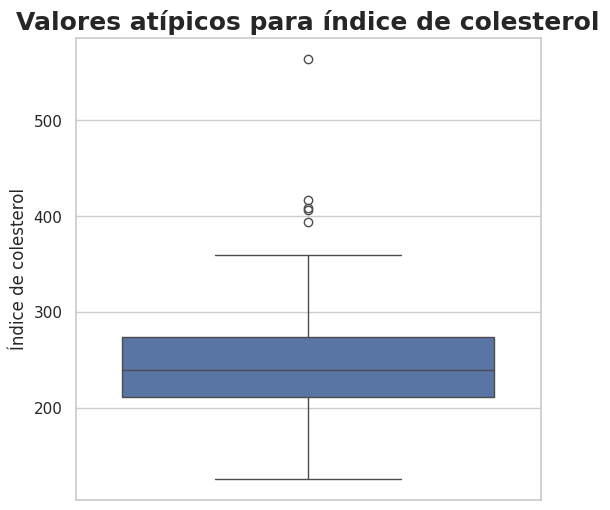

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para índice de colesterol", fontsize=18, fontweight="bold")
sns.boxplot(y='chol',data=data_heart)
plt.ylabel("Índice de colesterol")
plt.show()

In [ ]:
# Identifica los valores atìpicos
IQR = np.quantile(data_heart.chol, 0.75) - np.quantile(data_heart.chol, 0.25)
limite = np.quantile(data_heart.chol, 0.75) + IQR*1.5
data_heart[data_heart.chol > limite]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


---
### Comentarios acerca del índice de colesterol
---

+ El valor máximo del índice es de 546 mg/dl (miligramos por decilitro).
+ El promedio es del 246 mg/dl aproximadamente
+ El 75% de los pacientes presenta un índice igual o inferior a 274.5 mg/dl
+ Existen valor atípicos (outliers)

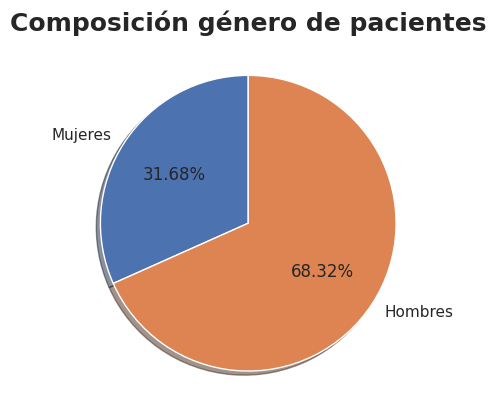

In [13]:
clases = np.array([data_heart[data_heart.sex == 0].shape[0],
                   data_heart[data_heart.sex == 1].shape[0]])
labels = ['Mujeres', 'Hombres']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Composición género de pacientes', fontsize=18, fontweight="bold")
plt.show()

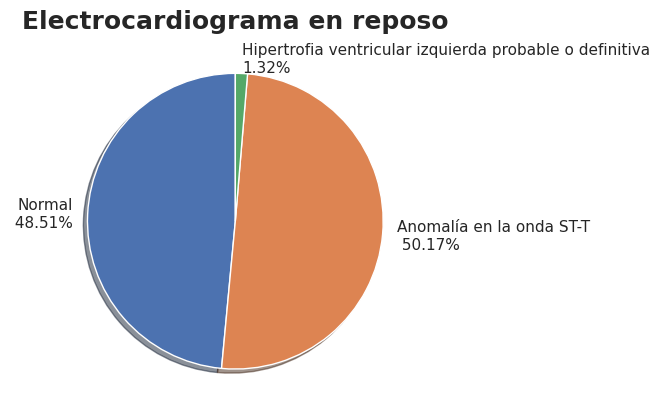

In [ ]:
clases = np.array([data_heart[data_heart.restecg == 0].shape[0],
                   data_heart[data_heart.restecg == 1].shape[0],
                   data_heart[data_heart.restecg == 2].shape[0]
                   ])
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Normal\n ' + labels[0]
labels[1] = 'Anomalía en la onda ST-T\n ' + labels[1]
labels[2] = 'Hipertrofia ventricular izquierda probable o definitiva\n' + labels[2]

plt.pie(clases, labels=labels,
        shadow=True, startangle=90)
plt.title('Electrocardiograma en reposo', fontsize=18, fontweight="bold")
plt.show()

In [ ]:
# Totales por resultado del electrocardiograma en reposo
index = ['Normal', 'Anomalía en la onda ST-T', 'Hipertrofia ventricular izquierda probable o definitiva']
print(pd.DataFrame(data=data_heart.groupby("restecg").size().values.reshape(3,-1),
        index = index, columns = ['Frecuencia']))

                                                    Frecuencia
Normal                                                     147
Anomalía en la onda ST-T                                   152
Hipertrofia ventricular izquierda probable o de...           4


In [ ]:
# Totales por tipo de dolor de pecho
index = ['Angina típica', 'Angina atípica', 'Dolor no anginoso', 'Asintomático']
print(pd.DataFrame(data=data_heart.groupby("cp").size().values.reshape(len(index),-1),
        index = index, columns = ['Frecuencia']))

                   Frecuencia
Angina típica             143
Angina atípica             50
Dolor no anginoso          87
Asintomático               23


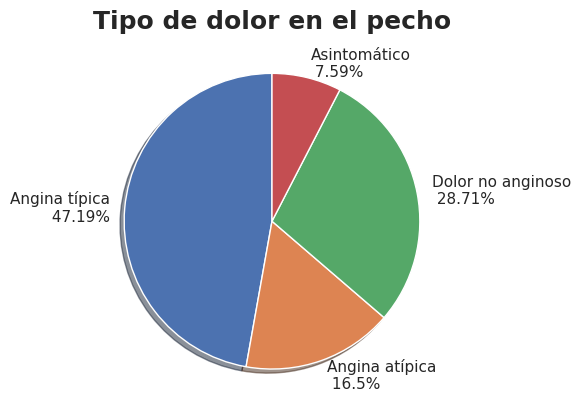

In [ ]:
clases = np.array([data_heart[data_heart.cp == 0].shape[0],
                   data_heart[data_heart.cp == 1].shape[0],
                   data_heart[data_heart.cp == 2].shape[0],
                   data_heart[data_heart.cp == 3].shape[0]
                   ])
values_labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels = ['Angina típica\n ' + values_labels[0],
            'Angina atípica\n ' + values_labels[1],
            'Dolor no anginoso\n ' + values_labels[2],
            'Asintomático\n ' + values_labels[3]
            ]
plt.pie(clases, labels=labels,
        shadow=True, startangle=90)
plt.title('Tipo de dolor en el pecho', fontsize=18, fontweight="bold")
plt.show()

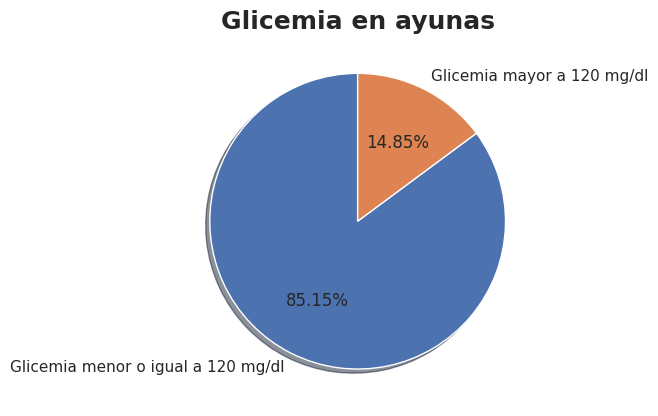

In [ ]:
clases = np.array([data_heart[data_heart.fbs == 0].shape[0],
                   data_heart[data_heart.fbs == 1].shape[0]])
labels = ['Glicemia menor o igual a 120 mg/dl', 'Glicemia mayor a 120 mg/dl']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Glicemia en ayunas', fontsize=18, fontweight="bold")
plt.show()

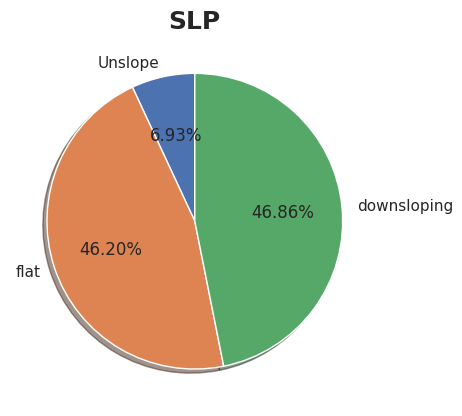

In [ ]:
clases = np.array([data_heart[data_heart.slp == 0].shape[0],
                   data_heart[data_heart.slp == 1].shape[0],
                   data_heart[data_heart.slp == 2].shape[0]
                   ])
labels = ['Unslope', 'flat', 'downsloping']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('SLP', fontsize=18, fontweight="bold")
plt.show()

# Hipótesis

Determinar si un paciente tiene mayor o menor chance de sufrir un accidente cardíaco considerando ciertas características médicas del paciente. Características médicas que consideran aspectos como: edad, nivel de colesterol, presión arterial, presencia de dolor en el pecho, frecuencia cardíaca.

## Análisis preliminar

Antes de construir los posibles modelos de machine learning usando aprendizaje supervisado se realizarán algunos análisis preliminares sobre las variables.

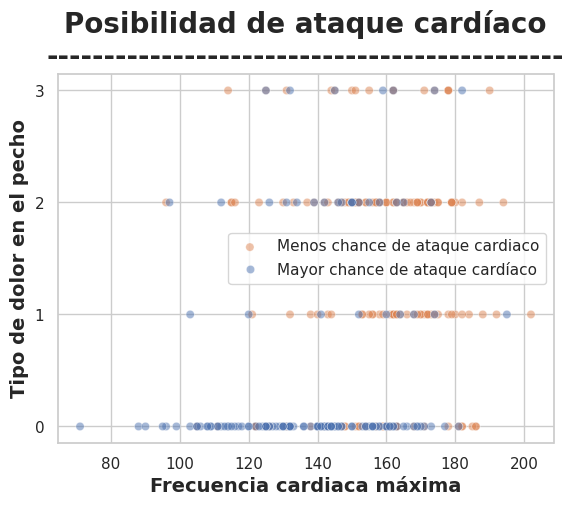

In [ ]:
sns.scatterplot(
    data = data_heart,
    x = "thalachh",
    y = "cp",
    hue = "output",
    alpha = 0.5
)
plt.legend(['Menos chance de ataque cardiaco','Mayor chance de ataque cardíaco'])
plt.yticks(range(0,4,1))
plt.xlabel("Frecuencia cardiaca máxima", fontsize=14, fontweight="bold")
plt.ylabel("Tipo de dolor en el pecho", fontsize=14, fontweight="bold")
plt.title("Posibilidad de ataque cardíaco\n" + "-"*45, fontsize=20, fontweight = "bold");

---
$\textbf{COMENTARIO}$

---
+ Los pacientes que presentan dolor de pecho del tipo $\textit{angina típica}$ es más probable que sufran un ataque cardíaco (concentración de puntos azules en el valor 0 para el eje Y)

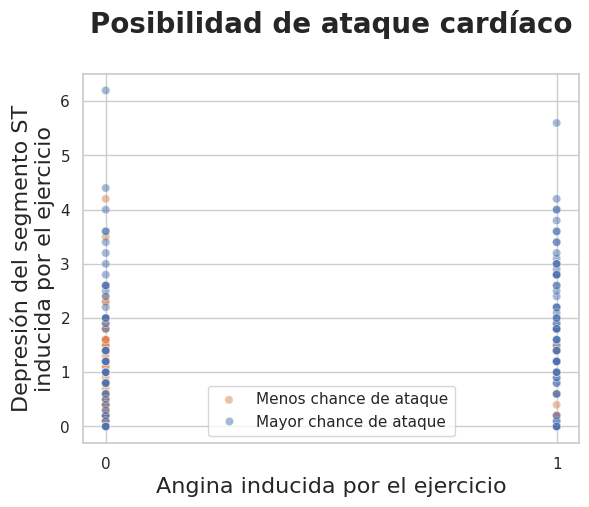

In [ ]:
sns.scatterplot(
    data = data_heart,
    x = "exng",
    y = "oldpeak",
    hue = "output",
    alpha = 0.5
)
plt.legend(['Menos chance de ataque','Mayor chance de ataque'])
plt.xticks(range(0,2,1))
plt.xlabel("Angina inducida por el ejercicio", fontsize=16)
plt.ylabel("Depresión del segmento ST\ninducida por el ejercicio", fontsize=16)
plt.title("Posibilidad de ataque cardíaco\n", fontsize=20, fontweight = "bold");

# Modelos de machine learning

## Aprendizaje supervisado

Se construirá un modelo de clasificación que permita predecir si un paciente presenta mayor o menor chance de sufrir un ataque al corazón considerando las características médicas que se tienen.

In [14]:
def view_matrix(matriz : np.array, clases : np.array):
    """ Matriz de confusión de forma gráfica """
    plt.figure(figsize=(5,5),facecolor= 'silver')
    group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
    plt.title("Matriz de confusión", fontsize=22, fontweight="bold")
    plt.xlabel("Predicción", fontsize=20)
    plt.ylabel("Real", fontsize=20)
    plt.show()

### Regresión logística

In [15]:
# Determina los datos con los cuales se trabajará
features = data_heart.drop(columns = ['output']).columns
X = data_heart[features]
y = data_heart.output

In [16]:
# Separa la data en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29, shuffle = True, stratify = y)

In [17]:
# Crea y entrena el modelo
clf_base = LogisticRegression(random_state=29)
clf_base.fit(X_train, y_train)
y_pred = clf_base.predict(X_test)

In [18]:
clases = ['Menor chance de ataque', 'Mayor chance de ataque']
print(classification_report(y_test, y_pred, target_names=clases))

                        precision    recall  f1-score   support

Menor chance de ataque       0.91      0.71      0.80        28
Mayor chance de ataque       0.79      0.94      0.86        33

              accuracy                           0.84        61
             macro avg       0.85      0.83      0.83        61
          weighted avg       0.85      0.84      0.83        61



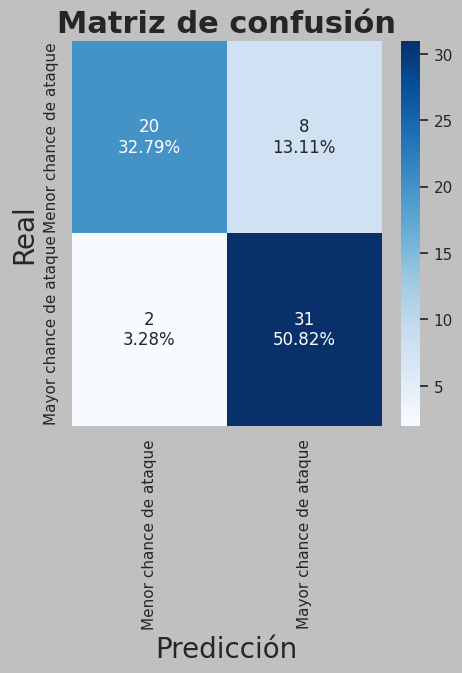

In [19]:
# Determina la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz, clases)

#### Cálculo e interpretación de medidas

Se implementan algunas funciones útiles

In [20]:
def metrics_by_matrix(matriz : np.ndarray):
    """ Retorna las métricas de clasificación desde la matriz de confusión """
    tn, fp, fn, tp = matriz.ravel()
    accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
    precision_manual = tp/(tp+fp)
    recall_manual = tp/(tp+fn)
    f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
    return accuracy_manual, precision_manual, recall_manual, f1_score_manual

def get_auc(real, prediccion):
    """ Retorna AUC, TPR y FPR """
    fpr, tpr, thresholds = roc_curve(real, prediccion)
    return auc(fpr, tpr), tpr, fpr, thresholds

def false_positive_rate(cm):
    """Recibe una matriz de confusión y retorna la métrica de False Positive Rate"""
    tn, fp, fn, tp = cm.ravel()
    return fp / (fp + tn)


In [22]:
def interpretaciones(recall_value : float, precision_value : float, accuracy_value : float, positive_text : str):
  """
  Se ofrecen interpretaciones menos genéricas y más orientadas al negocio de las métricas, se omite f1-score porque es una combinación de precision y recall
  """
  recall_interpretacion = f"Se han identificado el {recall_value*100:.2f}% de {positive_text}"
  precision_interpretacion = f"Se han identificado un {precision_value*100:.2f}% de pacientes {positive_text} y que realmente lo son"
  accuracy_interpretacion = f"El modelo acierta con un {accuracy_value*100:.2f}% de acertividad la menor o mayar chance de sufrir un ataque"
  return recall_interpretacion, precision_interpretacion, accuracy_interpretacion


In [23]:
# Obtiene las métricas a partir de la matriz de confusión
accuracy_manual, precision_manual, recall_manual, f1_score_manual = metrics_by_matrix(matriz)
print("{0:<15} = {1:.4f}".format("Precision",precision_manual))
print("{0:<15} = {1:.4f}".format("Recall", recall_manual))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual))
print("{0:<15} = {1:.4f}".format("Accuracy ", accuracy_manual))

Precision       = 0.7949
Recall          = 0.9394
F1-score        = 0.8611
Accuracy        = 0.8361


Las interpretaciones consideran la clase positiva a aquella que está rotulada como $\textbf{(mayor chance de sufrir ataque cardíaco)}$

In [24]:
r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual, precision_manual, accuracy_manual,"con mayor riesgo de sufrir un ataque")
print("\n", r_interpretacion, "\n", p_interpretacion, "\n", a_interpretacion)


 Se han identificado el 93.94% de con mayor riesgo de sufrir un ataque 
 Se han identificado un 79.49% de pacientes con mayor riesgo de sufrir un ataque y que realmente lo son 
 El modelo acierta con un 83.61% de acertividad la menor o mayar chance de sufrir un ataque


In [25]:
# Define rangos para catalogar el valor de ROC_AUC
valores = [[0.5, 0.59], [0.6, 0.74]
,[0.75, 0.89], [0.9, 0.97]]
rangos = pd.DataFrame(np.array(valores).reshape(4,-1),
            index = ['Malo', 'Regular', 'Bueno', 'Muy bueno'], columns = ['Inferior', 'Superior'])
print(rangos)

           Inferior  Superior
Malo           0.50      0.59
Regular        0.60      0.74
Bueno          0.75      0.89
Muy bueno      0.90      0.97


In [26]:
# Obtiene el valor del área bajo la curva
roc_auc_base = roc_auc_score(y_test, clf_base.predict_proba(X_test)[:, 1])
print("ROC_AUC score LogisticRegression : {:.2f}".format(roc_auc_base))

ROC_AUC score LogisticRegression : 0.92


In [27]:
def view_rango(df_rangos : pd.DataFrame, value_roc_auc : int):
    """ Retorna la clasificación del rendimiento según el valor de roc_auc """
    return df_rangos[(df_rangos['Inferior'] <= value_roc_auc) & (value_roc_auc <= df_rangos['Superior'])].index[0]

In [28]:
print(view_rango(rangos, roc_auc_base))

Muy bueno


In [29]:
auc_base, tpr_base, fpr_base, _ = get_auc(y_test, y_pred)
print("{0:<10} = {1:.4f}".format("AUC", auc_base))
print("{0:<10} = {1}".format("TPR",tpr_base))
print("{0:<10} = {1}".format("FPR",fpr_base))

AUC        = 0.8268
TPR        = [0.         0.93939394 1.        ]
FPR        = [0.         0.28571429 1.        ]


In [30]:
# Guarda el historial de resultados
history = []
history.append([accuracy_manual, roc_auc_score(y_test, clf_base.predict_proba(X_test)[:, 1])])
print(pd.DataFrame(history, index = ['LogisticRegression'],
            columns = ['Accuracy', 'ROC_AUC']))

                    Accuracy   ROC_AUC
LogisticRegression  0.836066  0.917749


Ahora se prueba usando un modelo usando regresión logística solo considerando las variables con mayor correlación positiva y negativa obtenidas anteriormente. Esto es para ver si se puede mejorar lo que ya se tiene de base y tomar este nuevo modelo como base.

In [31]:
lst_features = ['cp', 'thalachh', 'exng', 'oldpeak']
X_alt = data_heart[lst_features]
y_alt = data_heart.output
# Separa la data en entrenamiento y prueba
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_alt, y_alt, test_size=0.2,
            random_state = 29, stratify=y_alt, shuffle=True )

clf_x = LogisticRegression(random_state=29)
clf_x.fit(X_train_a, y_train_a)
y_pred_a = clf_x.predict(X_test_a)

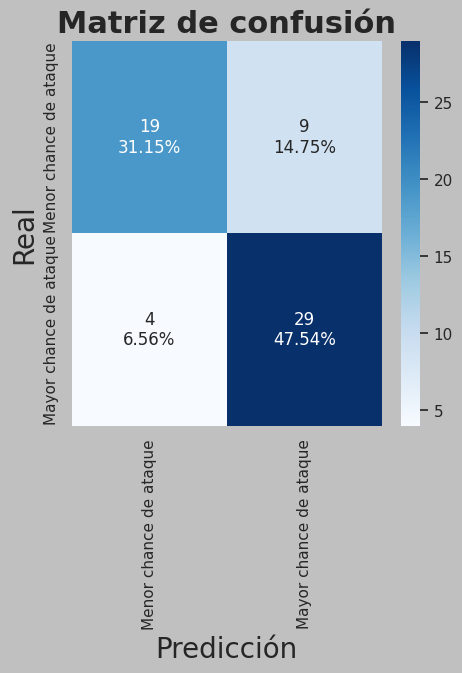

In [32]:
# Obtiene matriz de confusión
matriz_x = confusion_matrix(y_test_a, y_pred_a)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_x, clases)

In [33]:
accuracy_manual_a, precision_manual_a, recall_manual_a, f1_score_manual_a = metrics_by_matrix(matriz_x)
print("{0:<15} = {1:.4f}".format("Precision",precision_manual_a))
print("{0:<15} = {1:.4f}".format("Recall", recall_manual_a))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual_a))
print("{0:<15} = {1:.4f}".format("Accuracy ", accuracy_manual_a))

Precision       = 0.7632
Recall          = 0.8788
F1-score        = 0.8169
Accuracy        = 0.7869


In [34]:
r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual_a, precision_manual_a, accuracy_manual_a,"con mayor riesgo de sufrir un ataque")
print("\n", r_interpretacion, "\n", p_interpretacion, "\n", a_interpretacion)


 Se han identificado el 87.88% de con mayor riesgo de sufrir un ataque 
 Se han identificado un 76.32% de pacientes con mayor riesgo de sufrir un ataque y que realmente lo son 
 El modelo acierta con un 78.69% de acertividad la menor o mayar chance de sufrir un ataque


In [35]:
# Obtiene el valor del área bajo la curva
roc_auc_x =  roc_auc_score(y_test_a, clf_x.predict_proba(X_test_a)[:, 1])
print("ROC_AUC score LogisticRegression : {:.2f}".format(roc_auc_x))

ROC_AUC score LogisticRegression : 0.87


In [36]:
# Muestra el nivel de rendimiento del modelo considerando el ROC_AUC
print(view_rango(rangos, roc_auc_x))

Bueno


In [37]:
auc_clf_x, tpr_clf_x, fpr_clf_x, _ = get_auc(y_test_a, y_pred_a)
print("{0:<10} = {1:.4f}".format("AUC", auc_clf_x))
print("{0:<10} = {1}".format("TPR",tpr_clf_x))
print("{0:<10} = {1}".format("FPR",fpr_clf_x))

AUC        = 0.7787
TPR        = [0.         0.87878788 1.        ]
FPR        = [0.         0.32142857 1.        ]


#### Validación cruzada

Aplica validación cruzada al modelo base, es decir, a la regresión logística usando la $\textbf{totalidad de las variables.}$

In [38]:
def metrics_with_cv(modelo, X, y):
    """ Aplica validación cruzada y retorna las medidas """
    metrics = ['roc_auc','accuracy']
    # Calcula las métricas
    metrics_values = cross_validate(modelo, X, y, scoring = metrics, cv = 10)
    return metrics_values

In [39]:
# Aplica validación cruzada al que será el modelo base
metrics_values = metrics_with_cv(clf_base, X_train, y_train)
print("ROC_AUC")
print(metrics_values['test_roc_auc'])
print("ACCURACY")
print(metrics_values['test_accuracy'])

ROC_AUC
[0.73376623 0.7987013  0.9020979  0.8951049  0.95804196 1.
 0.95804196 0.95804196 0.82517483 0.88111888]
ACCURACY
[0.64       0.72       0.83333333 0.875      0.95833333 0.91666667
 0.91666667 0.83333333 0.83333333 0.875     ]


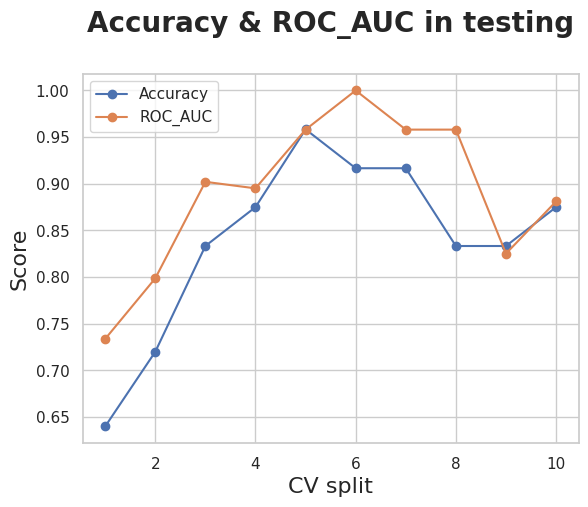

In [40]:
# Grafica resultados
plt.plot(range(1,11), metrics_values['test_accuracy'], label="Accuracy", marker="o")
plt.plot(range(1,11), metrics_values['test_roc_auc'], label="ROC_AUC", marker="o")
plt.title("Accuracy & ROC_AUC in testing\n", fontsize=20, fontweight="bold")
plt.xlabel("CV split", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend()
plt.show()

In [41]:
# Guarda resultados para graficar después
lr_scores_roc_auc = metrics_values['test_roc_auc']
lr_scores_accuracy = metrics_values['test_accuracy']

In [42]:
accuracy_cv = np.mean(metrics_values['test_accuracy'])
roc_auc_cv = np.mean(metrics_values['test_roc_auc'])
print("{0:<17} = {1:.4f}".format("Accuracy with CV", accuracy_cv))
print("{0:<17} = {1:.4f}".format("ROC_AUC with CV", roc_auc_cv))

Accuracy with CV  = 0.8402
ROC_AUC with CV   = 0.8910


In [43]:
history.append([accuracy_cv, roc_auc_cv])
print(pd.DataFrame(history, index = ['LogisticRegression','LogisticRegression with CV'],
            columns = ['Accuracy', 'ROC_AUC']))

                            Accuracy   ROC_AUC
LogisticRegression          0.836066  0.917749
LogisticRegression with CV  0.840167  0.891009


### Clasificador usando árbol de decisión

+ Se experimentará con varios valores para el hiper parámetro de la profundidad máxima del árbol, considerando para cada caso el score obtenido por el modelo.
+ Con lo anterior será posible contrastar los resultados con la línea base de la que se parte y que se pretende mejorar (resultado obtenido con la regresión logística)

En este caso se procede a usar todas las características disponibles para el entrenamiento

In [45]:
scores, models, roc_scores = [], [], []
for x_depth in range(2, 11):
    model_tree = DecisionTreeClassifier(max_depth=x_depth, criterion = "entropy", random_state=29)

    metrics_values = metrics_with_cv(model_tree, X_train, y_train)
    roc_auc = metrics_values['test_roc_auc'].mean()
    accuracy = metrics_values['test_accuracy'].mean()

    scores.append(accuracy)
    roc_scores.append(roc_auc)

    models.append(model_tree)
print(scores)
print(roc_scores)

[0.6859999999999999, 0.7565, 0.7443333333333333, 0.7488333333333334, 0.7655, 0.7366666666666666, 0.749, 0.7406666666666666, 0.749]
[0.7706293706293706, 0.7948551448551447, 0.8001248751248751, 0.7721778221778222, 0.7578671328671328, 0.7473526473526474, 0.7488261738261739, 0.7418331668331668, 0.7481268731268731]


In [46]:
# Imprime el mejor resultado considerando el ROC_AUC
print("Score más alto de {0:.3f} con profundidad {1}".format(roc_scores[np.argmax(roc_scores)],
            np.argmax(roc_scores) + 2))
best_model = models[np.argmax(roc_scores)]
print(best_model)

Score más alto de 0.800 con profundidad 4
DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=29)


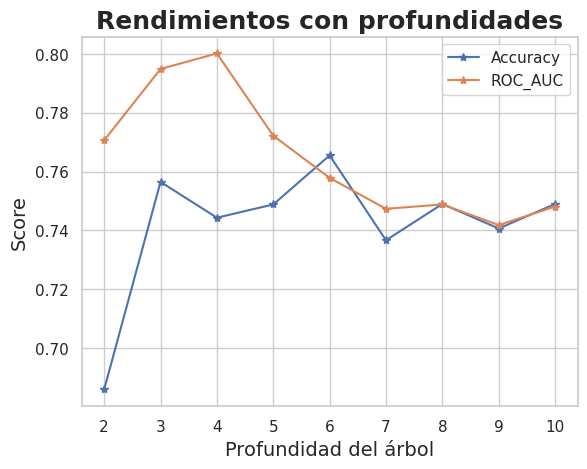

In [47]:
# Gráfica del resultado
plt.plot(range(2, 11),scores, label="Accuracy", marker="*")
plt.plot(range(2, 11),roc_scores, label="ROC_AUC", marker="*")
plt.xlabel("Profundidad del árbol", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Rendimientos con profundidades", fontsize=18, fontweight="bold")
plt.legend()
plt.show()

In [48]:
# Entrena el mejor modelo producto de la "experimentación"
best_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=29)

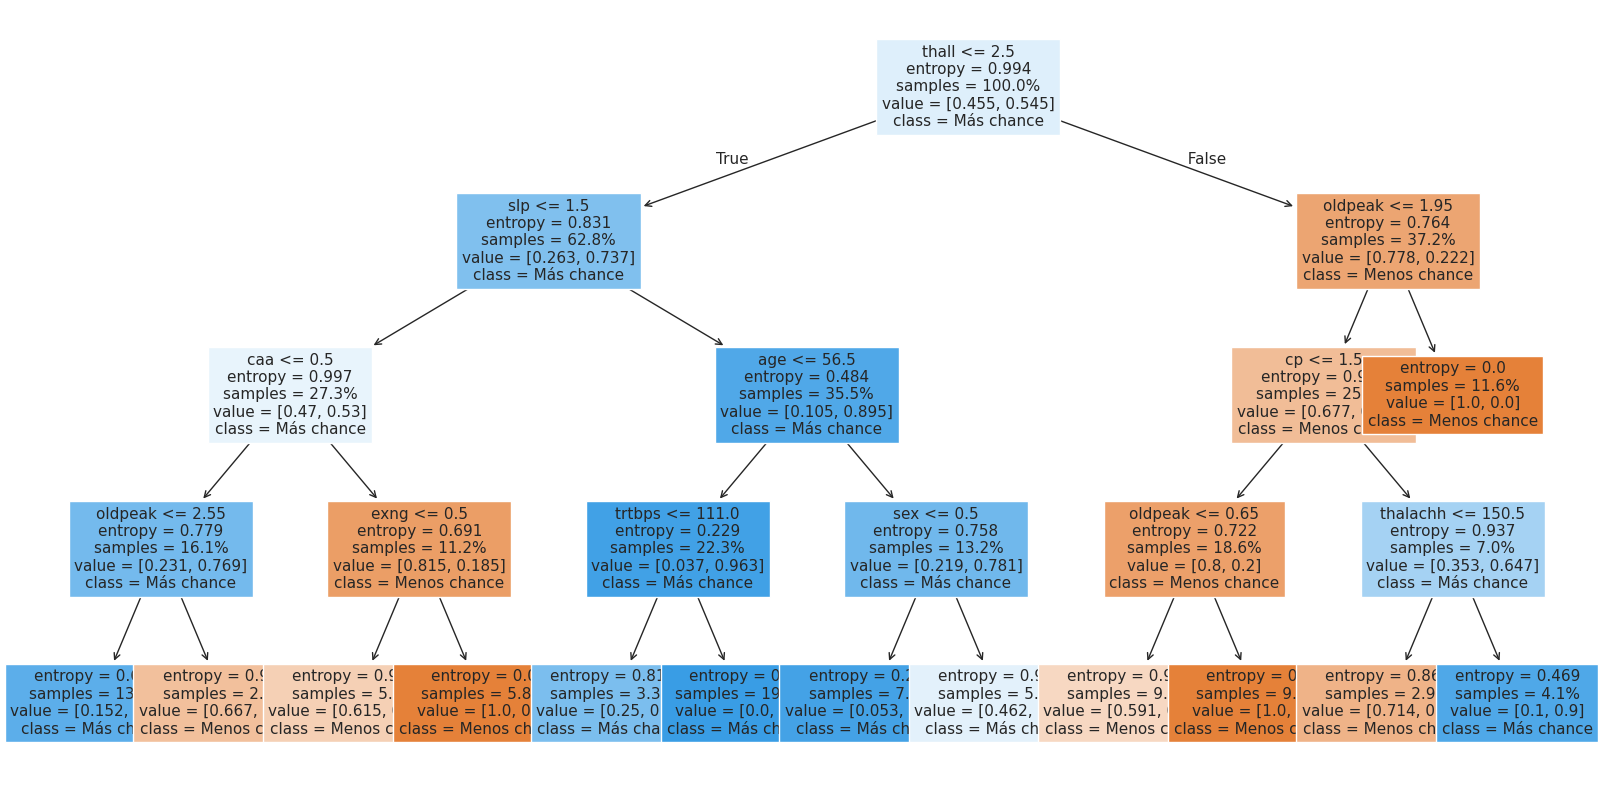

In [49]:
plt.figure(figsize = (20,10))
plot_tree( # Función que nos permite visualizar el árbol de decisión ajustado.
    best_model, # Objeto árbol de decisión entrenado.
    feature_names = features, # Nombres de las variables utilizadas para entrenar.
    class_names = ["Menos chance","Más chance"], # Nombre de las clases que estamos prediciendo.
    label = "all", # Etiqueta todas características de cada nodo.
    proportion = True, # Visualiza las proporciones de datos en cada nodo de decisión,
    filled=True, # Colorea los nodos
    fontsize=11, # Establece el tamaño de la letra del texto dentro de cada nodo.
)
plt.show();

In [50]:
# Muestra la importancia de las variables de acuerdo con lo que el árbol aprendió
df_importancia = pd.DataFrame(best_model.feature_importances_.reshape(-1, 1),
             index = best_model.feature_names_in_, columns = ['importancia'])
df_importancia.importancia.sort_values(ascending = False)

,importancia
thall,0.313034
oldpeak,0.194359
slp,0.130835
caa,0.115617
cp,0.054025
exng,0.042540
trtbps,0.040348
sex,0.039002
thalachh,0.035802
age,0.034437


In [51]:
# Muestra el reporte de clasificación
print(classification_report(
    y_test,
    best_model.predict(X_test), target_names=clases
))

                        precision    recall  f1-score   support

Menor chance de ataque       0.77      0.71      0.74        28
Mayor chance de ataque       0.77      0.82      0.79        33

              accuracy                           0.77        61
             macro avg       0.77      0.77      0.77        61
          weighted avg       0.77      0.77      0.77        61



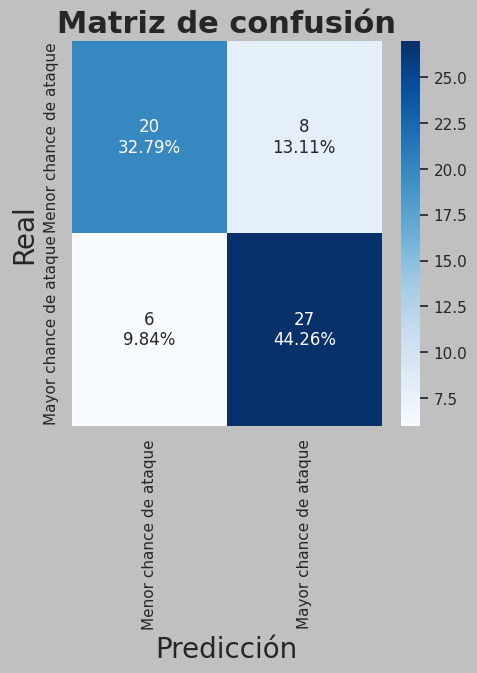

In [53]:
# Realiza las predicciones
y_pred_tree = best_model.predict(X_test)
matriz_tree = confusion_matrix(y_test, y_pred_tree)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_tree, clases)

In [54]:
# Obtiene las métricas a partir de la matriz
accuracy_manual, precision_manual, recall_manual, f1_score_manual = metrics_by_matrix(matriz_tree)
print("{0:<15} = {1:.4f}".format("Precision",precision_manual))
print("{0:<15} = {1:.4f}".format("Recall", recall_manual))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual))
print("{0:<15} = {1:.4f}".format("Accuracy", accuracy_manual))

Precision       = 0.7714
Recall          = 0.8182
F1-score        = 0.7941
Accuracy        = 0.7705


In [55]:
# Obtiene el valor del área bajo la curva
roc_auc_tree =  roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print("ROC_AUC score DecisionTree : {:.2f}".format(roc_auc_tree))
print(view_rango(rangos, roc_auc_tree))

ROC_AUC score DecisionTree : 0.80
Bueno


In [56]:
auc_dt, tpr_dt, fpr_dt, _= get_auc(y_test, y_pred_tree)
print("{0:<10} = {1:.4f}".format("AUC", auc_dt))
print("{0:<10} = {1}".format("TPR",tpr_dt))
print("{0:<10} = {1}".format("FPR",fpr_dt))

AUC        = 0.7662
TPR        = [0.         0.81818182 1.        ]
FPR        = [0.         0.28571429 1.        ]


In [57]:
# Agrega resultados al historial
history.append([accuracy_manual,roc_auc_tree])

In [58]:
history

[[0.8360655737704918, 0.9177489177489178],
 [0.8401666666666667, 0.891008991008991],
 [0.7704918032786885, 0.7987012987012987]]

In [59]:
print(pd.DataFrame(history, index = ['LogisticRegression', 'LogistocRegression with CV', 'DecisionTree'],
            columns = ['Accuracy', 'ROC_AUC']))

                            Accuracy   ROC_AUC
LogisticRegression          0.836066  0.917749
LogistocRegression with CV  0.840167  0.891009
DecisionTree                0.770492  0.798701


### Clasificación usando RandomForest

In [64]:
random_forest = RandomForestClassifier(random_state = 29, n_estimators = 30, criterion = "entropy") # Instancia Random Forest.
random_forest.fit( # Entrena el modelo.
    X_train,
    y_train
)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=29)

In [65]:
# El mejor estimador
random_forest.estimators_[-1]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=643252703)

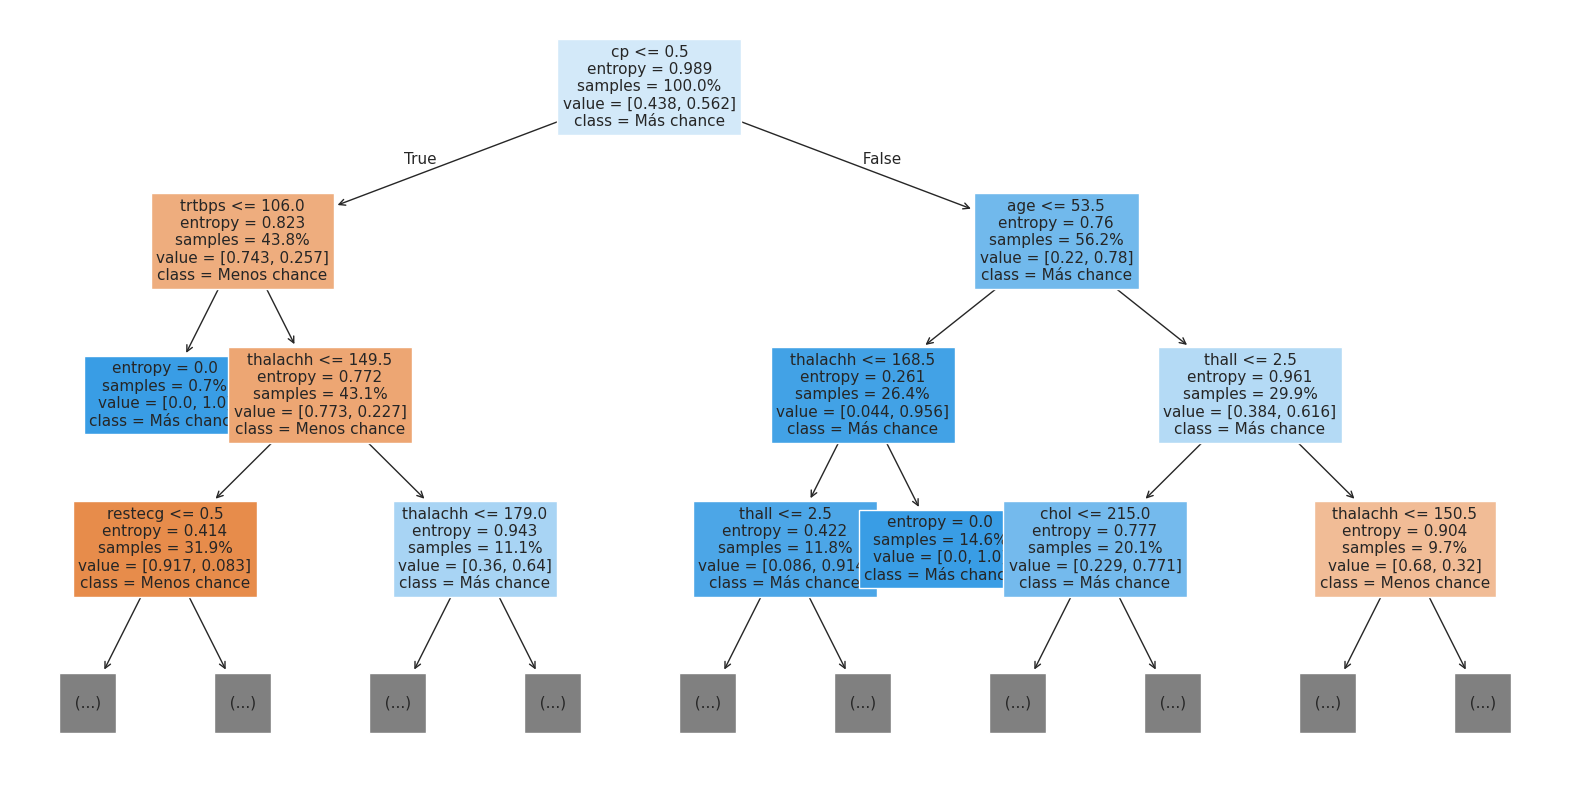

In [66]:
plt.figure(figsize = (20,10))
plot_tree( # Función que permite visualizar el árbol de decisión ajustado.
    random_forest.estimators_[-1], # Objeto árbol de decisión entrenado.
    feature_names = features, # Nombres de las variables utilizadas para entrenar.
    class_names = ["Menos chance","Más chance"], # Nombre de las clases que se están prediciendo.
    label = "all", # Etiqueta todas características de cada nodo.
    proportion = True, # Visualiza las proporciones de datos en cada nodo de decisión,
    filled=True, # Colorea los nodos
    fontsize=11, # Establece el tamaño de la letra del texto dentro de cada nodo.
    max_depth = 3 # Profundidad màxima a mostrar
)
plt.show();

In [67]:
# Obtiene la importancia que el algoritmo le da a las variables
df_importancia = pd.DataFrame(random_forest.feature_importances_.reshape(-1, 1),
             index = random_forest.feature_names_in_, columns = ['importancia'])
df_importancia.importancia.sort_values(ascending = False)

,importancia
cp,0.125648
thalachh,0.124317
oldpeak,0.109945
age,0.101662
caa,0.101219
thall,0.093517
chol,0.088242
trtbps,0.083609
slp,0.049533
exng,0.046490


$\textbf{Comentarios de RandomForest}$
+ Le da importancia a todas las variables, esto es por la combinación de árboles que genera.
+ Curioso resulta que la variable $\textit{fbs}$ (glicemia en ayunas) se considere (para el modelo) una variable menos importante respecto del resto.

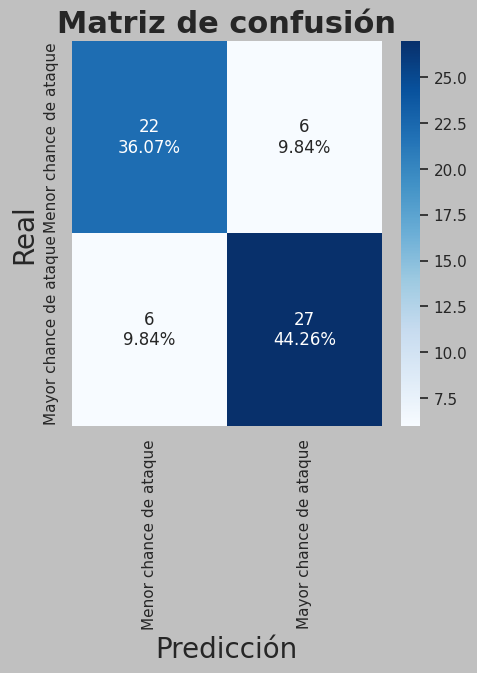

In [68]:
# Realiza las predicciones
y_pred_rf = random_forest.predict(X_test)
matriz_rf = confusion_matrix(y_test, y_pred_rf)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_rf, clases)

In [69]:
# Obtiene las métricas a partir de la matriz de confusión
accuracy_manual, precision_manual, recall_manual, f1_score_manual = metrics_by_matrix(matriz_rf)
print("{0:<15} = {1:.4f}".format("Precision", precision_manual))
print("{0:<15} = {1:.4f}".format("Recall", recall_manual))
print("{0:<15} = {1:.4f}".format("F1-score", f1_score_manual))
print("{0:<15} = {1:.4f}".format("Accuracy", accuracy_manual))

Precision       = 0.8182
Recall          = 0.8182
F1-score        = 0.8182
Accuracy        = 0.8033


In [70]:
print(classification_report(
    y_test,
    random_forest.predict(X_test), target_names=clases
))

                        precision    recall  f1-score   support

Menor chance de ataque       0.79      0.79      0.79        28
Mayor chance de ataque       0.82      0.82      0.82        33

              accuracy                           0.80        61
             macro avg       0.80      0.80      0.80        61
          weighted avg       0.80      0.80      0.80        61



In [71]:
# Obtiene el valor del área bajo la curva
roc_auc_rf =  roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
print("ROC_AUC score RandomForest : {:.2f}".format(roc_auc_rf))
print(view_rango(rangos, roc_auc_rf))

ROC_AUC score RandomForest : 0.91
Muy bueno


In [72]:
auc_rf, tpr_rf, fpr_rf, _ = get_auc(y_test, y_pred_rf)
print("{0:<10} = {1:.4f}".format("AUC", auc_rf))
print("{0:<10} = {1}".format("TPR",tpr_rf))
print("{0:<10} = {1}".format("FPR",fpr_rf))

AUC        = 0.8019
TPR        = [0.         0.81818182 1.        ]
FPR        = [0.         0.21428571 1.        ]


In [73]:
# Agrega resultados al historial
history.append([accuracy_manual,roc_auc_rf])


In [74]:
print(pd.DataFrame(history, index = ['LogisticRegression',  'LogistocRegression with CV',
'DecisionTree', 'RandomForest'],
            columns = ['Accuracy', 'ROC_AUC']))

                            Accuracy   ROC_AUC
LogisticRegression          0.836066  0.917749
LogistocRegression with CV  0.840167  0.891009
DecisionTree                0.770492  0.798701
RandomForest                0.803279  0.912338


#### Validación cruzada

In [75]:
metrics_values = metrics_with_cv(random_forest, X_train, y_train)
print("ROC_AUC")
print(metrics_values['test_roc_auc'])
print("ACCURACY")
print(metrics_values['test_accuracy'])

ROC_AUC
[0.78896104 0.73376623 0.85314685 0.88811189 0.95104895 1.
 0.97552448 0.95104895 0.8006993  0.8951049 ]
ACCURACY
[0.72       0.68       0.79166667 0.79166667 0.875      0.91666667
 0.95833333 0.875      0.79166667 0.83333333]


In [76]:
# Guarda los resultados para graficar después
rf_scores_roc_auc = metrics_values['test_roc_auc']
rf_scores_accuracy = metrics_values['test_accuracy']

In [77]:
accuracy_rf_cv = np.mean(metrics_values['test_accuracy'])
roc_auc_rf_cv = np.mean(metrics_values['test_roc_auc'])
print("{0:<17} = {1:.4f}".format("Accuracy with CV", accuracy_rf_cv))
print("{0:<17} = {1:.4f}".format("ROC_AUC with CV", roc_auc_rf_cv))

Accuracy with CV  = 0.8233
ROC_AUC with CV   = 0.8837


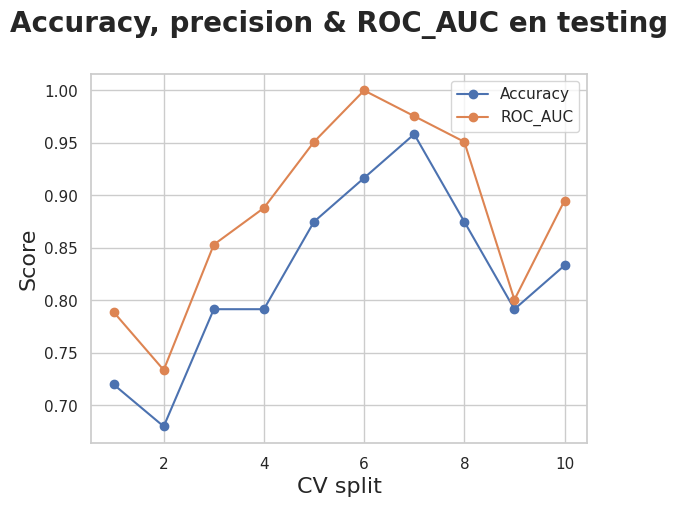

In [79]:
# Gráfica de los resultados
plt.plot(range(1,11), metrics_values['test_accuracy'], label="Accuracy", marker="o")
plt.plot(range(1,11), metrics_values['test_roc_auc'], label="ROC_AUC", marker="o")
plt.title("Accuracy, precision & ROC_AUC en testing\n", fontsize=20, fontweight="bold")
plt.xlabel("CV split", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend()
plt.show()

In [80]:
# Agrega resultados al historial
history.append([accuracy_rf_cv, roc_auc_rf_cv])

In [81]:
print(pd.DataFrame(history, index = ['LogisticRegression', 'LogisticRegression with CV', 'DecisionTree',
'RandomForest', 'RandomForest with CV'],
            columns = ['Accuracy', 'ROC_AUC']))

                            Accuracy   ROC_AUC
LogisticRegression          0.836066  0.917749
LogisticRegression with CV  0.840167  0.891009
DecisionTree                0.770492  0.798701
RandomForest                0.803279  0.912338
RandomForest with CV        0.823333  0.883741


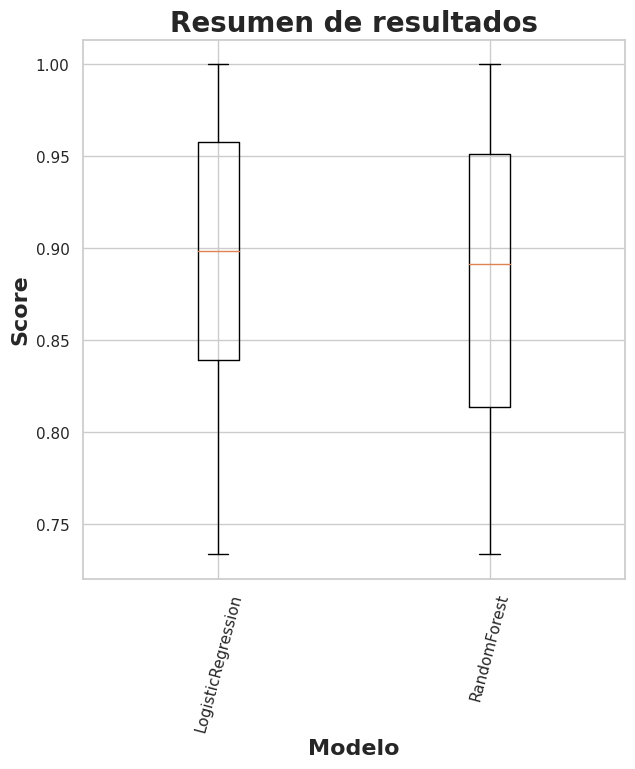

In [82]:
names = ['LogisticRegression', 'RandomForest']
scores_all = [lr_scores_roc_auc, rf_scores_roc_auc]
plt.figure(figsize=(7,7))
plt.boxplot(
    scores_all,
    labels = names
)
plt.xticks(rotation=75)
plt.title("Resumen de resultados", fontsize=20, fontweight = "bold")
plt.xlabel("Modelo", fontsize=16, fontweight="bold")
plt.ylabel("Score", fontsize=16, fontweight="bold")
plt.show()

In [83]:
dict(zip(names,map(np.mean,scores_all)))

{'LogisticRegression': 0.891008991008991, 'RandomForest': 0.8837412587412589}

# Conclusiones

+ La data seleccionada ya estaba preparada considerando la inexistencia de valores nulos y todas las columnas que son consideradas categóricas (por la naturaleza de sus valores) ya estaban codificadas. Esto facilita bastante el desarrollo del proyecto, dado que el tiempo que eso implica es importante.

+ Se logra construir un modelo de clasificación que permite determinar si un paciente presenta mayor o menor riesgo de sufir un ataque cardíaco.

+ Se construyen varios modelos de clasificación usando los algoritmos disponibles.

+ Es relevante analizar, quizás con mayor profundidad, las variables que el árbol de decisión logra otorgar a las características. Resultaría interesante saber cuál es la diferencia en rendimiento bajo ese escenario.

+ Hace algo de sentido, respecto de las variables importantes que el árbol de decisión ha seleccionado, que son variables que pudieran intuitivamente, ser consideradas como relevantes a la hora de predecir si existe mayor o menor posibilidad de sufir un ataque cardíaco.

+ Todo lo obtenido usando los distintos modelos del Machine Learning deben ser validados/respaldados con el especialista del área; dado que existen consideraciones importantes desde el punto de vista médico que resultan un poco dificil de, muchas veces, ser detectados con las técnicas de inteligencia artificial.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07f23d1d-551e-4d12-aca9-35e44a5bac4b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>